In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.3.0


In [3]:
tf.random.set_seed(89)

In [4]:
ds=pd.read_csv("input/train.csv")

In [5]:
ds.shape

(42000, 785)

In [6]:
ds.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [7]:
X=ds.iloc[:,1:].values
y=ds.iloc[:,0].values

In [8]:
#normalizing the data
X_scaled=X/255.

In [9]:
def Network():
    model=tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(784)))
    model.add(tf.keras.layers.Dense(256,activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128,activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(10,activation="softmax"))
    
    return model
model=Network()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [11]:
from keras import optimizers
optim = optimizers.Adam(lr = 0.0005)
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer = optim, metrics = ['accuracy'])

In [12]:
# defining scheduler
def scheduler(epoch, lr):
      if epoch < 10:
        return lr
      else:
        return lr * tf.math.exp(-0.1)

In [13]:
# Bundling all types of callbacks
my_callbacks=([
    tf.keras.callbacks.LearningRateScheduler(scheduler),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.05,patience=1)
    
    ])

In [14]:
# Training
trainer = model.fit(X_scaled, y,validation_split=0.3, epochs = 50, batch_size = 32, verbose = 1,callbacks=my_callbacks)

Epoch 1/50
919/919 [==============================] - 4s 4ms/step - loss: 0.4986 - accuracy: 0.8468 - val_loss: 0.1772 - val_accuracy: 0.9466
Epoch 2/50
919/919 [==============================] - 3s 4ms/step - loss: 0.2520 - accuracy: 0.9234 - val_loss: 0.1402 - val_accuracy: 0.9571
Epoch 3/50
919/919 [==============================] - 3s 4ms/step - loss: 0.1912 - accuracy: 0.9421 - val_loss: 0.1101 - val_accuracy: 0.9664
Epoch 4/50
919/919 [==============================] - 4s 4ms/step - loss: 0.1590 - accuracy: 0.9498 - val_loss: 0.1045 - val_accuracy: 0.9681
Epoch 5/50
919/919 [==============================] - 4s 4ms/step - loss: 0.1375 - accuracy: 0.9563 - val_loss: 0.1050 - val_accuracy: 0.9669
Epoch 6/50
919/919 [==============================] - 4s 4ms/step - loss: 0.1133 - accuracy: 0.9647 - val_loss: 0.0851 - val_accuracy: 0.9744
Epoch 7/50
919/919 [==============================] - 4s 4ms/step - loss: 0.0990 - accuracy: 0.9697 - val_loss: 0.0822 - val_accuracy: 0.9752
Epoch 

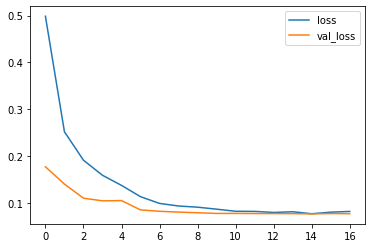

In [15]:
# Plot loss per iteration
plt.plot(trainer.history['loss'], label='loss')
plt.plot(trainer.history['val_loss'], label='val_loss')
plt.legend()

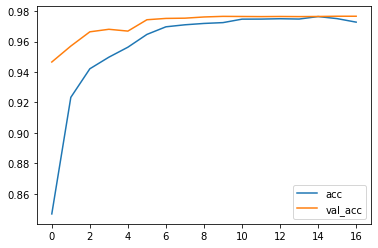

In [16]:
# Plot accuracy per iteration
plt.plot(trainer.history['accuracy'], label='acc')
plt.plot(trainer.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
test=pd.read_csv("input/test.csv")

In [18]:
test=test.iloc[:,:].values

In [19]:
test_scaled=test/255.

In [20]:
pred = model.predict_classes(test_scaled)

In [21]:
# create submission file
final_submission = pd.DataFrame({'ImageId': np.array(range(1,28001)), 'Label': pred})
final_submission.to_csv("submission.csv", index=False)

### Just the 1st part
### Next, needed to ensemble different models